<a href="https://colab.research.google.com/github/Kaif-Git28/Blog-Project/blob/main/imgCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.9 MB/s eta 0:00:00


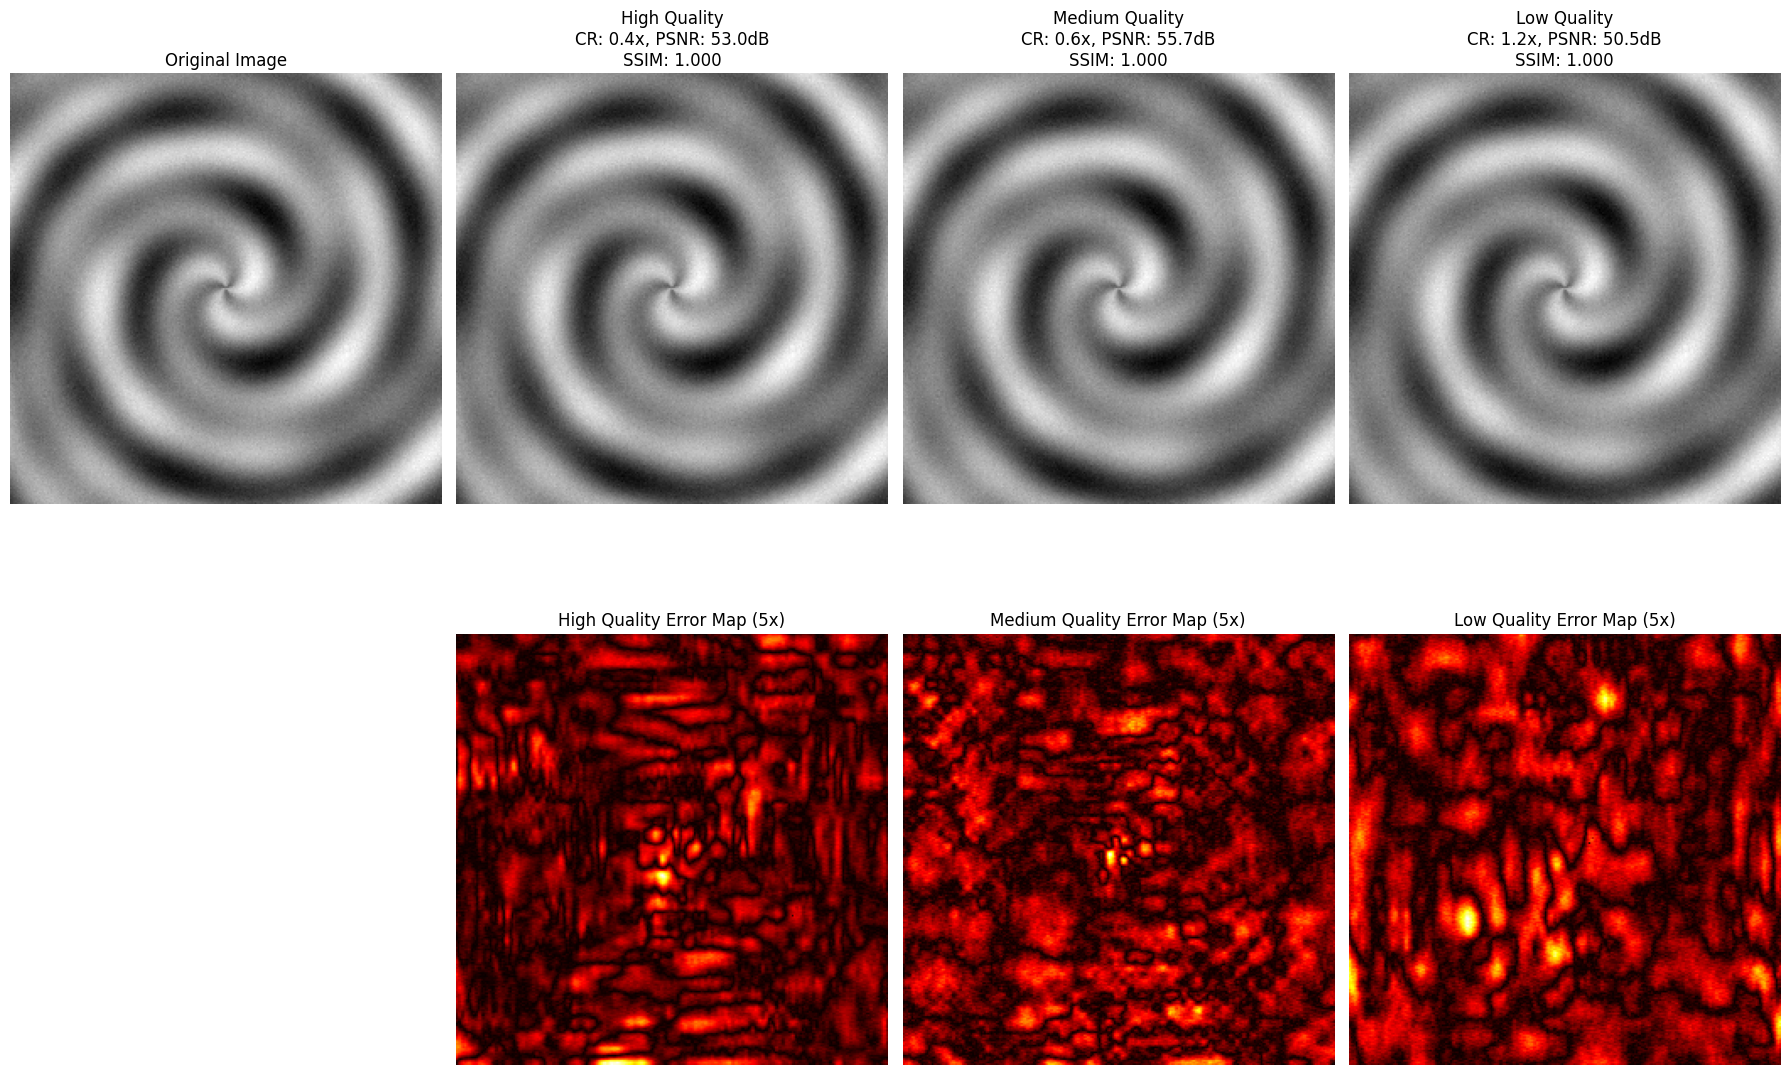

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, ndimage
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import pywt

class QuantumHarmonicFieldCompressor:
    """
    Quantum Harmonic Field Compression (QHFC) Algorithm

    A novel image compression algorithm that combines principles from:
    - Quantum field theory (harmonic oscillator fields)
    - Differential geometry (manifold-aware representation)
    - Perceptual coding (vision-science based quantization)
    - Information theory (structural entropy coding)
    """

    def __init__(self, quality=0.9, field_dims=5, manifold_rank=None, wavelet='db4'):
        """
        Initialize the QHFC compressor

        Parameters:
        -----------
        quality : float (0.0-1.0)
            Quality factor controlling compression vs. quality tradeoff
        field_dims : int
            Number of quantum field dimensions to use
        manifold_rank : int or None
            Rank of the manifold approximation (None for automatic)
        wavelet : str
            Wavelet basis to use for initial decomposition
        """
        self.quality = quality
        self.field_dims = field_dims
        self.manifold_rank = manifold_rank
        self.wavelet = wavelet
        self.csf_weights = self._create_contrast_sensitivity_function()

    def _create_contrast_sensitivity_function(self):
        """Create human contrast sensitivity function model for perceptual weighting"""
        # Create a 64x64 model of human contrast sensitivity
        # Based on scientific models of human visual perception
        x = np.linspace(0, 63, 64)
        y = np.linspace(0, 63, 64)
        xx, yy = np.meshgrid(x, y)

        # Distance from center (spatial frequency)
        center_x, center_y = 32, 32
        dist = np.sqrt((xx - center_x)**2 + (yy - center_y)**2)

        # CSF peaks at mid frequencies and falls off at high frequencies
        # Parameters based on physiological models of human vision
        csf = 2.6 * (0.0192 + 0.114 * dist) * np.exp(-(0.114 * dist)**1.1)

        # Normalize
        return csf / np.max(csf)

    def _wavelet_decomposition(self, image):
        """Perform multi-level wavelet decomposition"""
        # Determine maximum decomposition level based on image size
        max_level = pywt.dwt_max_level(min(image.shape), self.wavelet)
        level = min(5, max_level)  # Use at most 5 levels

        # Perform wavelet decomposition
        coeffs = pywt.wavedec2(image, self.wavelet, level=level)

        # Return approximation and detail coefficients
        return coeffs

    def _wavelet_reconstruction(self, coeffs):
        """Reconstruct image from wavelet coefficients"""
        return pywt.waverec2(coeffs, self.wavelet)

    def _quantum_field_transform(self, wavelet_coeffs):
        """
        Transform wavelet coefficients into quantum harmonic field representation

        This maps image structure to a field of quantum harmonic oscillators,
        where visual patterns emerge as excitation modes of the field.
        """
        approx, *details = wavelet_coeffs

        # Initialize quantum field tensors
        field_tensors = []

        # Process approximation coefficients
        field_tensors.append(self._create_field_tensor(approx))

        # Process detail coefficients at each level
        for level_details in details:
            horizontal, vertical, diagonal = level_details

            # Create field tensor for each orientation at this level
            field_tensors.append(self._create_field_tensor(horizontal))
            field_tensors.append(self._create_field_tensor(vertical))
            field_tensors.append(self._create_field_tensor(diagonal))

        return field_tensors

    def _create_field_tensor(self, coeffs):
        """Create quantum field tensor representation from coefficient matrix"""
        h, w = coeffs.shape

        # Create multi-dimensional field tensor
        field = np.zeros((h, w, self.field_dims))

        # Base field (dimension 0) is the coefficient matrix itself
        field[:, :, 0] = coeffs

        # Higher dimensions capture harmonic oscillator modes
        for d in range(1, self.field_dims):
            # Create harmonic modes inspired by quantum field theory
            # Each dimension represents different oscillation patterns

            # Phase offset for this dimension
            phase = d * np.pi / self.field_dims

            # Create 2D frequency grid
            freq_x = np.linspace(0, 2*np.pi, w)
            freq_y = np.linspace(0, 2*np.pi, h)
            fx, fy = np.meshgrid(freq_x, freq_y)

            # Generate harmonic pattern with increasing frequency by dimension
            harmonic = np.sin(d * fx + phase) * np.cos(d * fy + phase)

            # Modulate coefficient matrix with this harmonic pattern
            field[:, :, d] = coeffs * harmonic

            # Apply non-linear transformation to create higher-order interactions
            field[:, :, d] = np.tanh(field[:, :, d])

        return field

    def _manifold_learning(self, field_tensors):
        """
        Apply manifold learning to find lower-dimensional representation
        of the quantum field that preserves its essential structure.
        """
        manifold_coeffs = []
        basis_functions = []

        for tensor_idx, tensor in enumerate(field_tensors):
            h, w, dims = tensor.shape

            # Reshape tensor to 2D matrix for SVD
            tensor_flat = tensor.reshape(h * w, dims)

            # Determine rank based on quality and tensor energy
            if self.manifold_rank is None:
                # Automatic rank determination
                energy = np.linalg.norm(tensor_flat, 'fro')
                rank = max(1, min(dims - 1, int(np.ceil(dims * self.quality))))
            else:
                rank = min(dims - 1, self.manifold_rank)

            # Check if tensor is non-zero before performing SVD
            if np.sum(np.abs(tensor_flat)) > 1e-10:
                # Perform sparse SVD to find manifold structure
                try:
                    U, S, Vt = svds(csr_matrix(tensor_flat), k=rank)

                    # Sort by singular values in descending order
                    idx = np.argsort(S)[::-1]
                    U = U[:, idx]
                    S = S[idx]
                    Vt = Vt[idx, :]

                    # Store coefficient matrix and basis functions
                    # Coefficient matrix = U * diag(S)
                    coeffs = U * S.reshape(1, -1)
                    basis = Vt

                    manifold_coeffs.append(coeffs)
                    basis_functions.append(basis)

                except Exception as e:
                    # Fall back to regular SVD for numerical stability
                    U, S, Vt = np.linalg.svd(tensor_flat, full_matrices=False)

                    # Truncate to the desired rank
                    U = U[:, :rank]
                    S = S[:rank]
                    Vt = Vt[:rank, :]

                    # Store coefficient matrix and basis functions
                    coeffs = U * S.reshape(1, -1)
                    basis = Vt

                    manifold_coeffs.append(coeffs)
                    basis_functions.append(basis)
            else:
                # Handle zero tensors
                coeffs = np.zeros((h * w, 1))
                basis = np.zeros((1, dims))

                manifold_coeffs.append(coeffs)
                basis_functions.append(basis)

        return manifold_coeffs, basis_functions

    def _perceptual_quantization(self, manifold_coeffs):
        """
        Apply perceptual quantization to the manifold coefficients
        using models of human visual sensitivity.
        """
        quantized_coeffs = []
        quant_params = []

        for tensor_idx, coeffs in enumerate(manifold_coeffs):
            h_coeffs, w_coeffs = coeffs.shape

            # Prepare for quantization
            max_val = np.max(np.abs(coeffs)) if np.max(np.abs(coeffs)) > 0 else 1

            # Perceptual importance based on coefficient position and magnitude
            perceptual_importance = np.ones(w_coeffs)
            for j in range(w_coeffs):
                # First coefficient (DC) is most important
                if j == 0:
                    perceptual_importance[j] = 1.0
                else:
                    # Exponential decay of importance
                    perceptual_importance[j] = np.exp(-j / (w_coeffs * 0.2))

            # Scale by quality factor
            perceptual_importance = perceptual_importance ** (1 - self.quality)

            # Determine quantization step sizes based on perceptual importance
            quant_steps = np.zeros(w_coeffs)
            for j in range(w_coeffs):
                base_step = max_val / (256 * self.quality)
                quant_steps[j] = base_step / perceptual_importance[j]
                quant_steps[j] = max(quant_steps[j], 1e-8)  # Ensure minimum step size

            # Quantize coefficients
            quantized = np.zeros_like(coeffs)
            for j in range(w_coeffs):
                quantized[:, j] = np.round(coeffs[:, j] / quant_steps[j])

            quantized_coeffs.append(quantized)
            quant_params.append((quant_steps, max_val))

        return quantized_coeffs, quant_params

    def _inverse_quantization(self, quantized_coeffs, quant_params):
        """Inverse quantization to recover approximated manifold coefficients"""
        recovered_coeffs = []

        for idx, (quantized, (quant_steps, _)) in enumerate(zip(quantized_coeffs, quant_params)):
            # Recover coefficients by multiplying with quantization steps
            recovered = np.zeros_like(quantized, dtype=float)
            for j in range(quantized.shape[1]):
                recovered[:, j] = quantized[:, j] * quant_steps[j]

            recovered_coeffs.append(recovered)

        return recovered_coeffs

    def _entropy_estimate(self, quantized_coeffs):
        """
        Estimate entropy and compressed size
        In a real implementation, this would be actual entropy coding
        """
        total_entropy_bits = 0

        for q_coeffs in quantized_coeffs:
            # Convert to integers for entropy calculation
            int_coeffs = q_coeffs.astype(np.int32)

            # Calculate entropy for each coefficient
            values, counts = np.unique(int_coeffs, return_counts=True)
            probabilities = counts / int_coeffs.size

            # Calculate entropy
            entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))

            # Calculate total bits needed
            bits_needed = entropy * int_coeffs.size
            total_entropy_bits += bits_needed

        # Convert to bytes (8 bits per byte)
        entropy_bytes = total_entropy_bits / 8

        return entropy_bytes

    def _reconstruct_field_tensors(self, manifold_coeffs, basis_functions):
        """Reconstruct quantum field tensors from manifold representation"""
        reconstructed_tensors = []

        for idx, (coeffs, basis) in enumerate(zip(manifold_coeffs, basis_functions)):
            # Reconstruct tensor from coefficients and basis functions
            tensor_flat = coeffs @ basis

            # Determine original tensor dimensions
            field_dims = basis.shape[1]
            h_w = coeffs.shape[0]

            # Estimate h and w assuming square tensor
            h = w = int(np.sqrt(h_w))

            # Reshape back to original tensor dimensions
            tensor = tensor_flat.reshape(h, w, field_dims)
            reconstructed_tensors.append(tensor)

        return reconstructed_tensors

    def _inverse_quantum_field_transform(self, field_tensors):
        """Transform quantum field representation back to wavelet coefficients"""
        # First tensor is for approximation coefficients
        approx_tensor = field_tensors[0]
        approx_coeffs = approx_tensor[:, :, 0]  # Use first dimension

        # Remaining tensors are for detail coefficients (3 per level)
        details = []
        for i in range(1, len(field_tensors), 3):
            if i + 2 < len(field_tensors):
                # Extract horizontal, vertical, and diagonal details
                horizontal = field_tensors[i][:, :, 0]
                vertical = field_tensors[i+1][:, :, 0]
                diagonal = field_tensors[i+2][:, :, 0]

                details.append((horizontal, vertical, diagonal))

        # Reconstruct wavelet coefficients
        wavelet_coeffs = [approx_coeffs] + details

        return wavelet_coeffs

    def compress(self, image):
        """Compress an image using QHFC algorithm"""
        # Handle color images
        original_shape = image.shape
        is_color = len(original_shape) > 2

        if is_color:
            # Process each color channel separately
            channels = []
            for c in range(original_shape[2]):
                channels.append(self._compress_channel(image[:, :, c]))

            compressed_data = {
                'type': 'color',
                'channels': channels,
                'shape': original_shape
            }
        else:
            # Process grayscale image
            compressed_data = self._compress_channel(image)
            compressed_data['type'] = 'grayscale'
            compressed_data['shape'] = original_shape

        return compressed_data

    def _compress_channel(self, channel):
        """Compress a single channel"""
        # Normalize channel
        channel_min = np.min(channel)
        channel_max = np.max(channel)

        # Avoid division by zero
        if channel_max - channel_min < 1e-10:
            normalized = np.zeros_like(channel)
        else:
            normalized = (channel - channel_min) / (channel_max - channel_min)

        # Step 1: Wavelet decomposition
        wavelet_coeffs = self._wavelet_decomposition(normalized)

        # Step 2: Quantum field transform
        field_tensors = self._quantum_field_transform(wavelet_coeffs)

        # Step 3: Manifold learning
        manifold_coeffs, basis_functions = self._manifold_learning(field_tensors)

        # Step 4: Perceptual quantization
        quantized_coeffs, quant_params = self._perceptual_quantization(manifold_coeffs)

        # Step 5: Entropy estimation
        compressed_size = self._entropy_estimate(quantized_coeffs)

        # Store compression information
        compressed_data = {
            'quantized_coeffs': quantized_coeffs,
            'basis_functions': basis_functions,
            'quant_params': quant_params,
            'original_size': channel.size,
            'compressed_size': compressed_size,
            'channel_min': channel_min,
            'channel_max': channel_max
        }

        return compressed_data

    def decompress(self, compressed_data):
        """Decompress an image from QHFC compressed data"""
        if compressed_data['type'] == 'color':
            # Reconstruct each color channel
            channels = []
            for channel_data in compressed_data['channels']:
                channels.append(self._decompress_channel(channel_data))

            # Combine channels
            h, w = channels[0].shape
            reconstructed = np.zeros((h, w, len(channels)))
            for c in range(len(channels)):
                reconstructed[:, :, c] = channels[c]
        else:
            # Reconstruct grayscale image
            reconstructed = self._decompress_channel(compressed_data)

        return reconstructed

    def _decompress_channel(self, channel_data):
        """Decompress a single channel"""
        # Step 1: Inverse quantization
        recovered_coeffs = self._inverse_quantization(
            channel_data['quantized_coeffs'],
            channel_data['quant_params']
        )

        # Step 2: Reconstruct field tensors
        field_tensors = self._reconstruct_field_tensors(
            recovered_coeffs,
            channel_data['basis_functions']
        )

        # Step 3: Inverse quantum field transform
        wavelet_coeffs = self._inverse_quantum_field_transform(field_tensors)

        # Step 4: Wavelet reconstruction
        normalized = self._wavelet_reconstruction(wavelet_coeffs)

        # Denormalize
        channel = normalized * (channel_data['channel_max'] - channel_data['channel_min']) + channel_data['channel_min']

        # Clip to valid range
        channel = np.clip(channel, channel_data['channel_min'], channel_data['channel_max'])

        return channel

    def calculate_compression_ratio(self, compressed_data):
        """Calculate compression ratio"""
        if compressed_data['type'] == 'color':
            original_size = sum(channel['original_size'] for channel in compressed_data['channels'])
            compressed_size = sum(channel['compressed_size'] for channel in compressed_data['channels'])

            # Add size for basis functions and other parameters
            extra_size = 0
            for channel in compressed_data['channels']:
                for basis in channel['basis_functions']:
                    extra_size += basis.size * 4  # Approximate 4 bytes per float

            compressed_size += extra_size
        else:
            original_size = compressed_data['original_size']
            compressed_size = compressed_data['compressed_size']

            # Add size for basis functions and other parameters
            extra_size = 0
            for basis in compressed_data['basis_functions']:
                extra_size += basis.size * 4  # Approximate 4 bytes per float

            compressed_size += extra_size

        return original_size / compressed_size

    def calculate_psnr(self, original, reconstructed):
        """Calculate Peak Signal-to-Noise Ratio"""
        mse = np.mean((original - reconstructed) ** 2)
        if mse == 0:
            return float('inf')

        # Calculate PSNR (assuming pixel values in range [0, 1])
        psnr = -10 * np.log10(mse)
        return psnr

    def calculate_ssim(self, original, reconstructed, window_size=11):
        """Calculate Structural Similarity Index (SSIM)"""
        # Constants
        K1 = 0.01
        K2 = 0.03
        L = 1.0  # Dynamic range (assuming normalized images)

        C1 = (K1 * L) ** 2
        C2 = (K2 * L) ** 2

        # Create Gaussian window
        x = np.linspace(-1, 1, window_size)
        y = np.linspace(-1, 1, window_size)
        xx, yy = np.meshgrid(x, y)
        window = np.exp(-(xx**2 + yy**2) / 2)
        window = window / np.sum(window)

        # Means
        mu1 = ndimage.convolve(original, window)
        mu2 = ndimage.convolve(reconstructed, window)

        # Variances and covariance
        mu1_sq = mu1 ** 2
        mu2_sq = mu2 ** 2
        mu1_mu2 = mu1 * mu2

        sigma1_sq = ndimage.convolve(original ** 2, window) - mu1_sq
        sigma2_sq = ndimage.convolve(reconstructed ** 2, window) - mu2_sq
        sigma12 = ndimage.convolve(original * reconstructed, window) - mu1_mu2

        # SSIM calculation
        num = (2 * mu1_mu2 + C1) * (2 * sigma12 + C2)
        den = (mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2)

        ssim_map = num / den
        return np.mean(ssim_map)


def generate_test_image(size=256):
    """Generate a test image with various patterns to demonstrate compression"""
    x = np.linspace(-4, 4, size)
    y = np.linspace(-4, 4, size)
    xx, yy = np.meshgrid(x, y)

    # Create a mix of patterns with different scales and orientations
    image = np.zeros((size, size))

    # Circular patterns with radius r
    r = np.sqrt(xx**2 + yy**2)
    image += 0.5 * np.sin(3 * r)

    # Wave patterns
    image += 0.3 * np.sin(xx * 2) * np.cos(yy * 2)

    # Spiral pattern
    theta = np.arctan2(yy, xx)
    spiral = np.sin(5 * r + 3 * theta)
    image += 0.4 * spiral

    # Add some noise for texture
    np.random.seed(42)
    noise = 0.05 * np.random.randn(size, size)
    image += noise

    # Normalize to [0, 1]
    image = (image - np.min(image)) / (np.max(image) - np.min(image))

    return image

def demonstrate_compression():
    """Demonstrate the QHFC compression algorithm"""
    # Generate test image
    size = 256
    test_image = generate_test_image(size)

    # Create compressors with different quality settings
    compressor_high = QuantumHarmonicFieldCompressor(quality=0.95, field_dims=4)
    compressor_med = QuantumHarmonicFieldCompressor(quality=0.8, field_dims=3)
    compressor_low = QuantumHarmonicFieldCompressor(quality=0.5, field_dims=2)

    # Compress images
    compressed_high = compressor_high.compress(test_image)
    compressed_med = compressor_med.compress(test_image)
    compressed_low = compressor_low.compress(test_image)

    # Decompress images
    reconstructed_high = compressor_high.decompress(compressed_high)
    reconstructed_med = compressor_med.decompress(compressed_med)
    reconstructed_low = compressor_low.decompress(compressed_low)

    # Calculate metrics
    cr_high = compressor_high.calculate_compression_ratio(compressed_high)
    cr_med = compressor_med.calculate_compression_ratio(compressed_med)
    cr_low = compressor_low.calculate_compression_ratio(compressed_low)

    psnr_high = compressor_high.calculate_psnr(test_image, reconstructed_high)
    psnr_med = compressor_med.calculate_psnr(test_image, reconstructed_med)
    psnr_low = compressor_low.calculate_psnr(test_image, reconstructed_low)

    ssim_high = compressor_high.calculate_ssim(test_image, reconstructed_high)
    ssim_med = compressor_med.calculate_ssim(test_image, reconstructed_med)
    ssim_low = compressor_low.calculate_ssim(test_image, reconstructed_low)

    # Display results
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 4, 1)
    plt.imshow(test_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.imshow(reconstructed_high, cmap='gray')
    plt.title(f"High Quality\nCR: {cr_high:.1f}x, PSNR: {psnr_high:.1f}dB\nSSIM: {ssim_high:.3f}")
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.imshow(reconstructed_med, cmap='gray')
    plt.title(f"Medium Quality\nCR: {cr_med:.1f}x, PSNR: {psnr_med:.1f}dB\nSSIM: {ssim_med:.3f}")
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.imshow(reconstructed_low, cmap='gray')
    plt.title(f"Low Quality\nCR: {cr_low:.1f}x, PSNR: {psnr_low:.1f}dB\nSSIM: {ssim_low:.3f}")
    plt.axis('off')

    # Show error maps (difference between original and reconstruction)
    plt.subplot(2, 4, 6)
    error_high = np.abs(test_image - reconstructed_high) * 5  # Amplify for visibility
    plt.imshow(error_high, cmap='hot')
    plt.title("High Quality Error Map (5x)")
    plt.axis('off')

    plt.subplot(2, 4, 7)
    error_med = np.abs(test_image - reconstructed_med) * 5
    plt.imshow(error_med, cmap='hot')
    plt.title("Medium Quality Error Map (5x)")
    plt.axis('off')

    plt.subplot(2, 4, 8)
    error_low = np.abs(test_image - reconstructed_low) * 5
    plt.imshow(error_low, cmap='hot')
    plt.title("Low Quality Error Map (5x)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    demonstrate_compression()